# INFO BASICA

# LIBRERIAS

In [5]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [6]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [9]:
# Leo los indicadores

indicadores = pd.read_excel('./data/Serie de indicadores Macro.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Citi Economic Surprise - USA'])

indicadores.columns = ['Date','Citi']
indicadores['Date'] = pd.to_datetime(indicadores['Date'], format="%Y-%m-%d")
indicadores = indicadores.set_index('Date')
indicadores = indicadores.loc['2015-04-30':,:]

In [11]:
# Veo una muestra

indicadores.head(10)

,Citi
Date,
2015-04-30,-62.2
2015-05-01,-62.3
2015-05-04,-56.1
2015-05-05,-65.3
2015-05-06,-67.3
2015-05-07,-64.7
2015-05-08,-64.3
2015-05-11,-61.0
2015-05-12,-59.5


In [13]:
# Leo los indicadores

indicadores2 = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Indra'])

indicadores2.columns = ['Date','Precio']
indicadores2['Date'] = pd.to_datetime(indicadores2['Date'], format="%Y-%m-%d")
indicadores2 = indicadores2.set_index('Date')
indicadores2 = indicadores2.loc['2015-04-30':,:]

In [14]:
indicadores2.head()

,Precio
Date,
2015-04-30,10.560
2015-05-01,10.560
2015-05-04,10.710
2015-05-05,10.335
2015-05-06,10.390


In [15]:
indicadores2

,Precio
Date,
2015-04-30,10.560
2015-05-01,10.560
2015-05-04,10.710
2015-05-05,10.335
2015-05-06,10.390
2015-05-07,10.295
2015-05-08,10.450
2015-05-11,10.450
2015-05-12,9.700


In [16]:
# Escojo el Standar & Poors 500 y lo uno al indicador

indra_final = indicadores2.merge(indicadores, how='inner', on='Date')

In [17]:
# Veo una muestra

indra_final.head(20)

,Precio,Citi
Date,,
2015-04-30,10.560,-62.2
2015-05-01,10.560,-62.3
2015-05-04,10.710,-56.1
2015-05-05,10.335,-65.3
2015-05-06,10.390,-67.3
2015-05-07,10.295,-64.7
2015-05-08,10.450,-64.3
2015-05-11,10.450,-61.0
2015-05-12,9.700,-59.5


In [18]:
# Calculo la rentabilidad, lo hago mediante la variación porcentual de un día a otro

indra_final['Rentabilidad'] = indra_final.Precio.pct_change() * 100
indra_final.Rentabilidad = indra_final.Rentabilidad.fillna(0)

In [19]:
# Visualizo una muestra

indra_final.head(20)

,Precio,Citi,Rentabilidad
Date,,,
2015-04-30,10.560,-62.2,0.000000
2015-05-01,10.560,-62.3,0.000000
2015-05-04,10.710,-56.1,1.420455
2015-05-05,10.335,-65.3,-3.501401
2015-05-06,10.390,-67.3,0.532172
2015-05-07,10.295,-64.7,-0.914341
2015-05-08,10.450,-64.3,1.505585
2015-05-11,10.450,-61.0,0.000000
2015-05-12,9.700,-59.5,-7.177033


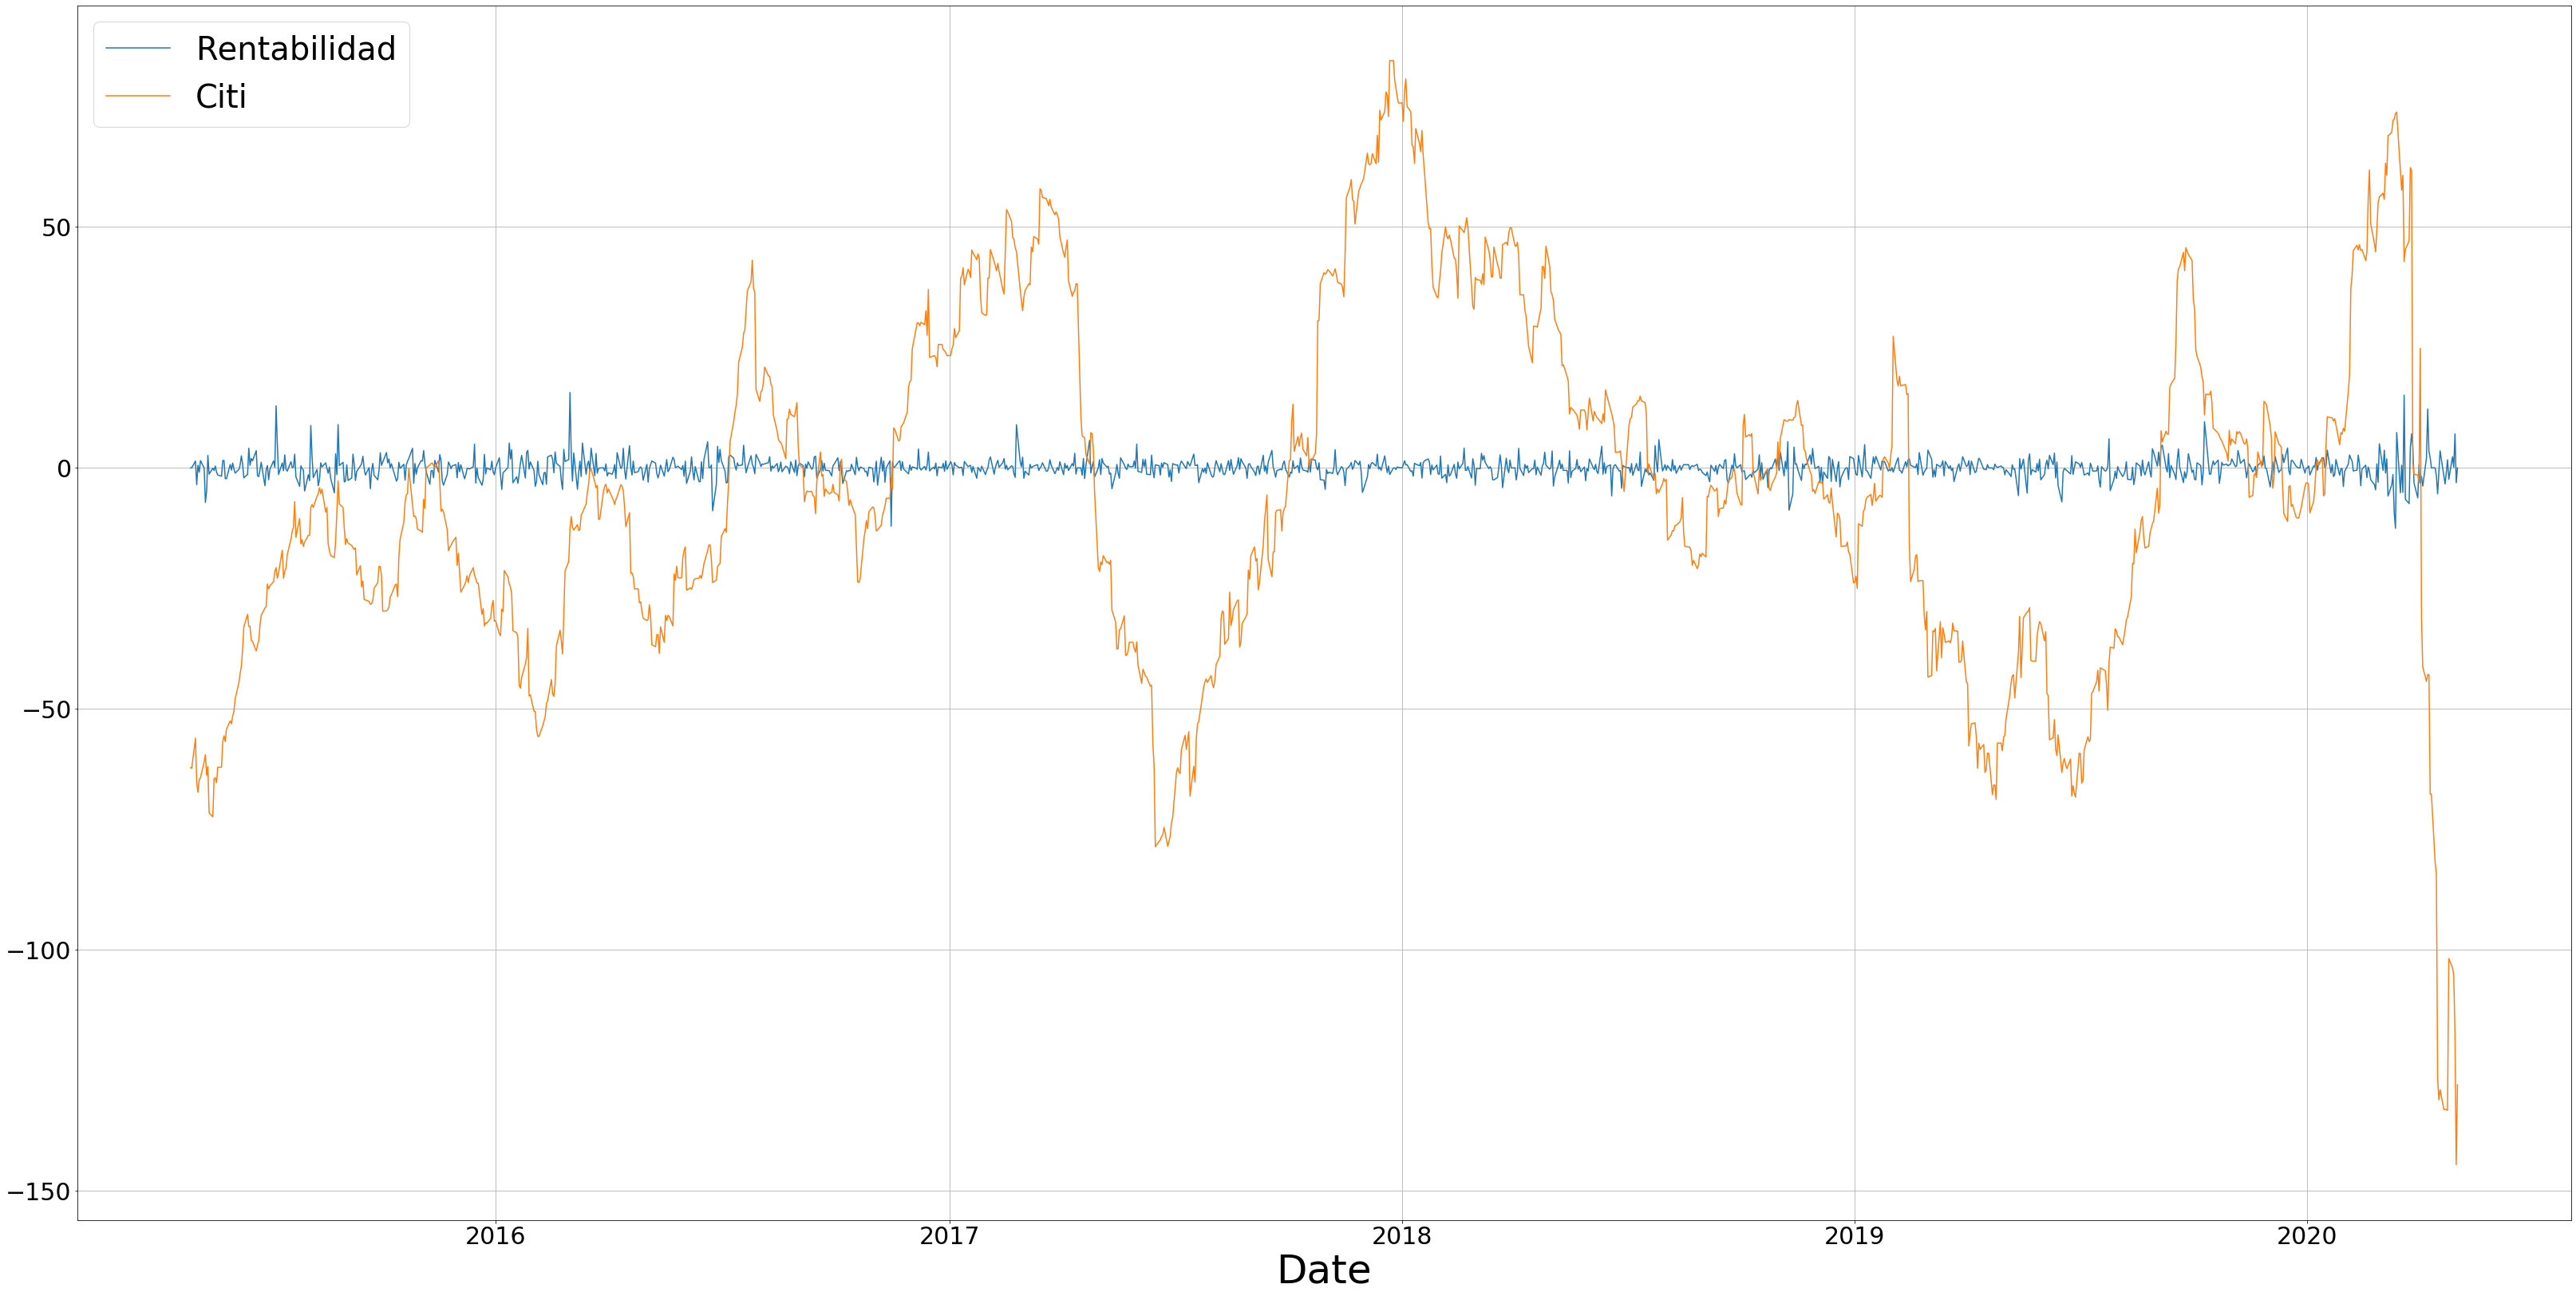

In [20]:
# Ploteo la rentabilidad y el Citi

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indra_final["Rentabilidad"])
ax1 = plt.plot(indra_final["Citi"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Rentabilidad", "Citi"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [21]:
# Ahora calculo la correlación, debo elegir la ventana // Se hace entre el Precio y el Citi

def correlacion(ventana=100):
    
    indra_final['Correlacion'] = indra_final.Precio.rolling(window=ventana).corr(indra_final.Citi)
    
correlacion()

In [22]:
# Visualizo una muestra // Dará NaN donde no haya ventana, meto un cero 

indra_final = indra_final.fillna(0)
indra_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion
Date,,,,
2018-03-13,11.870,43.2,0.253378,-0.329480
2019-12-24,10.120,-10.4,0.098912,0.080478
2017-05-17,12.015,-37.5,-1.111111,-0.506465
2017-12-26,11.415,80.5,0.000000,-0.814638
2019-02-21,9.500,-23.6,-1.401142,0.274608
2018-08-24,10.750,-19.2,0.279851,0.595757
2018-01-04,11.720,80.7,0.600858,-0.869292
2017-03-09,11.755,44.8,0.213129,0.072922
2019-01-08,8.185,-9.0,1.677019,-0.167806


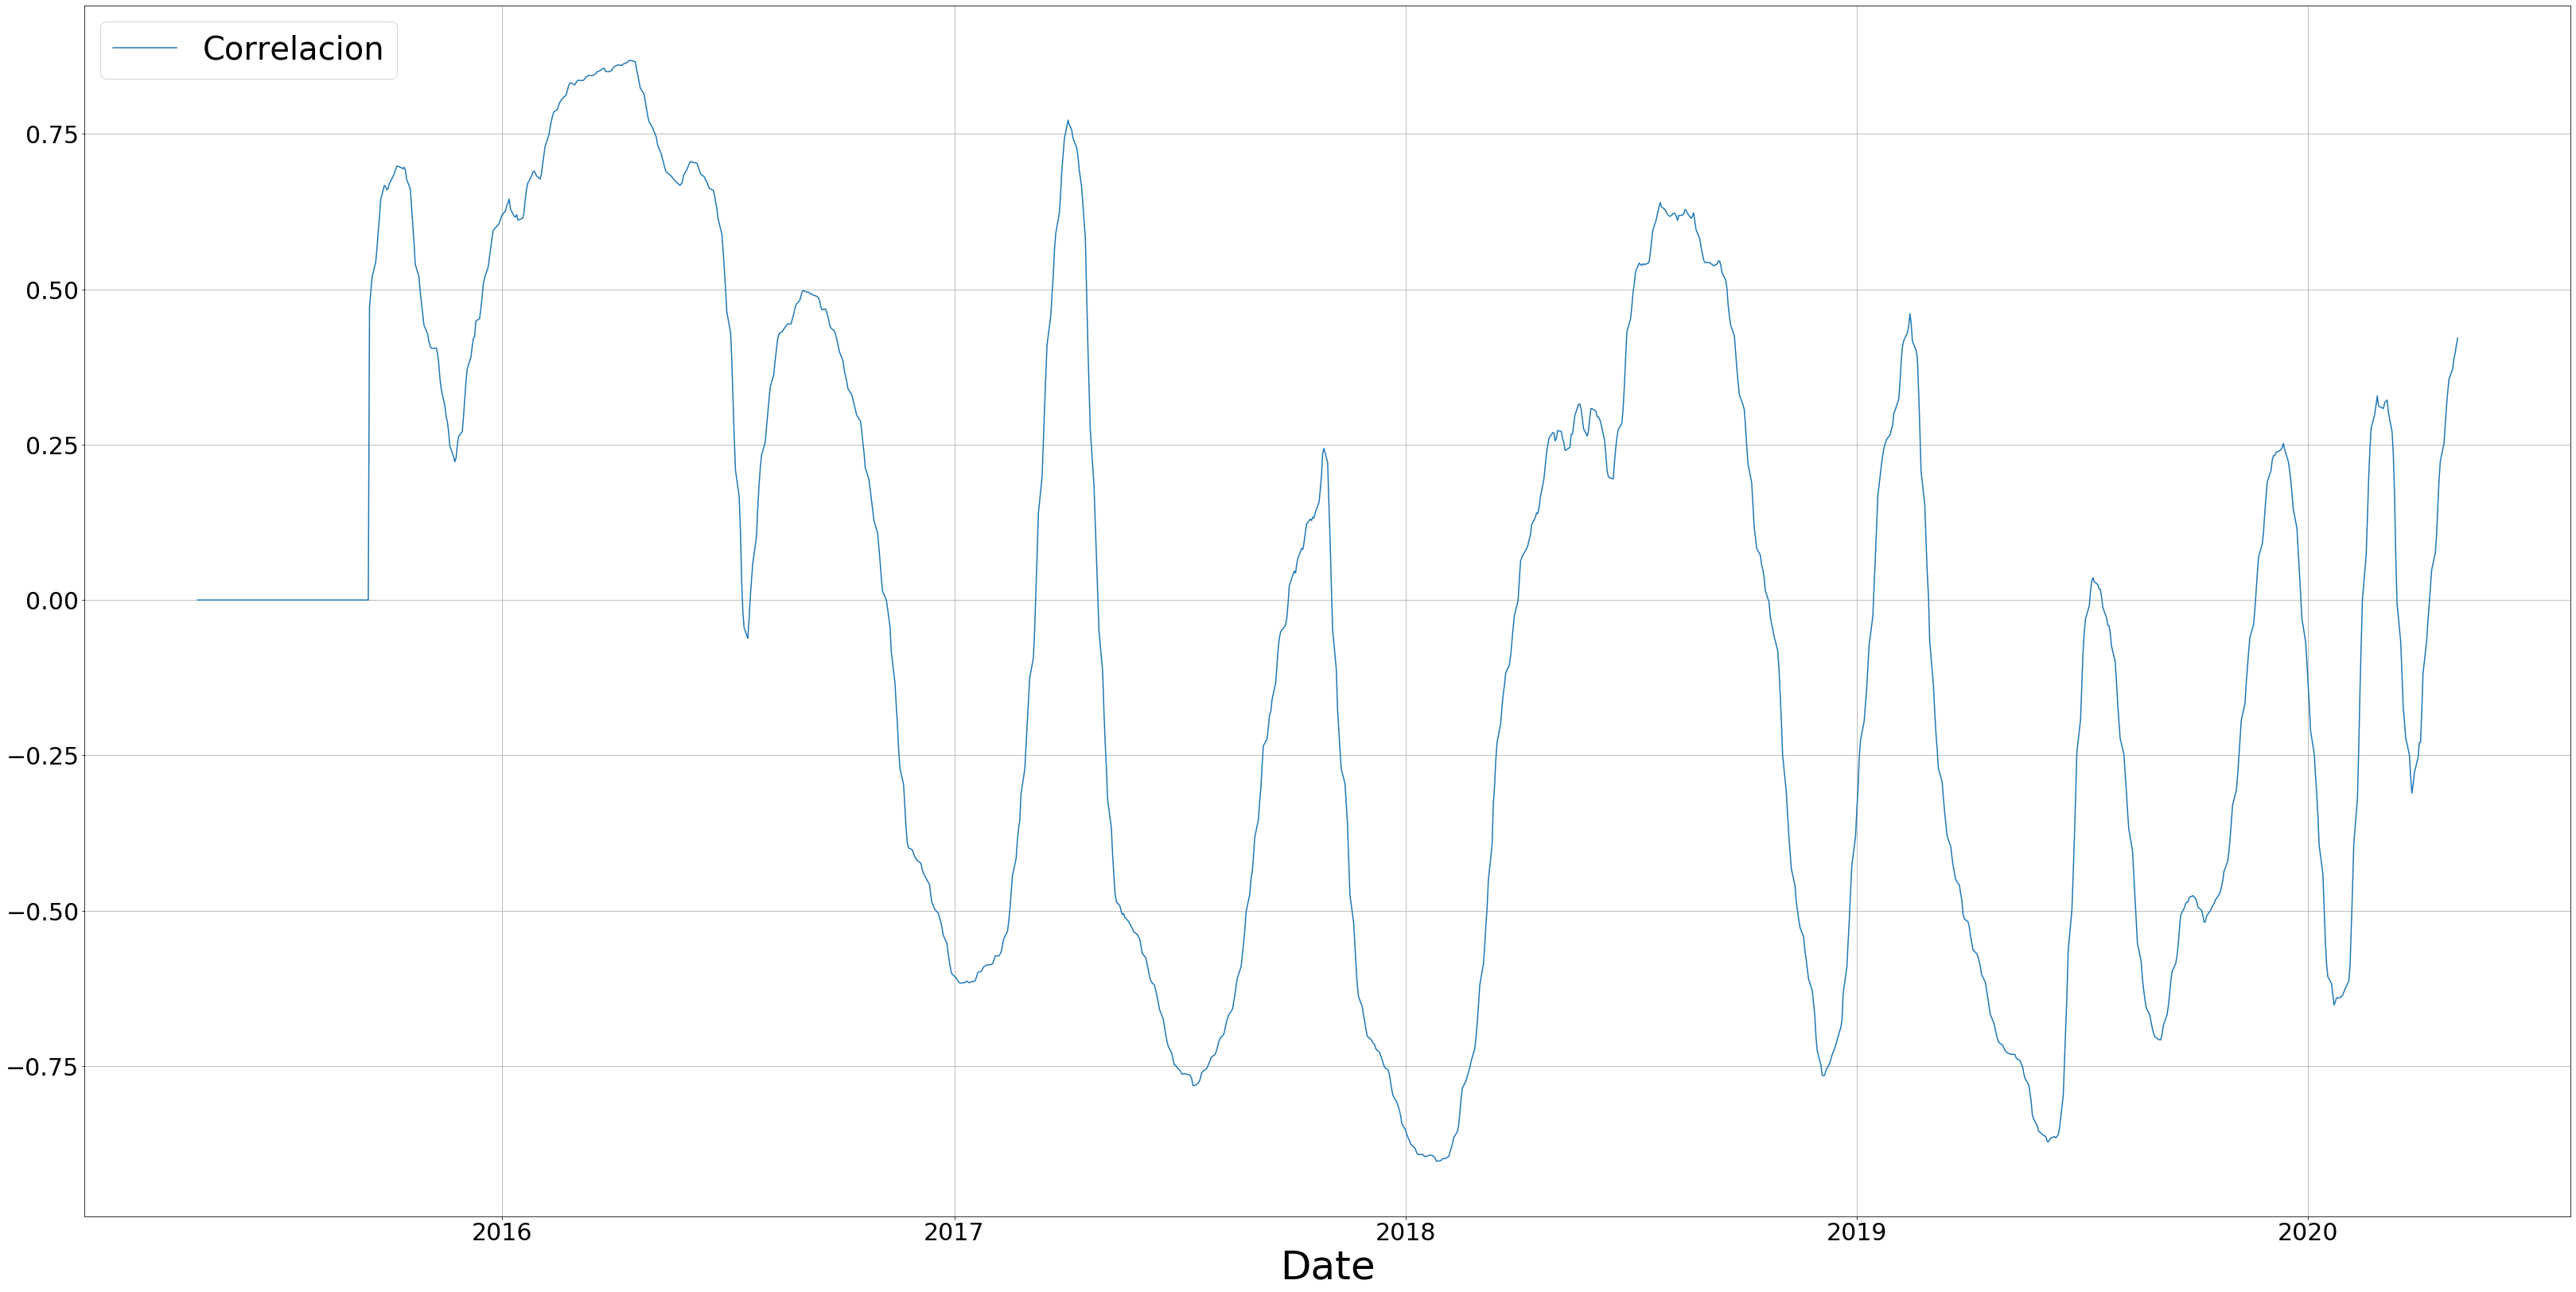

In [23]:
# Ploteo la correlacion

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indra_final["Correlacion"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Correlacion"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [24]:
# Ahora determino la señal


indra_final['Señal'] = np.where((indra_final.Correlacion>0)&(indra_final.Citi>0),1, # Ambos mayores de cero
                          np.where((indra_final.Correlacion>0)&(indra_final.Citi<0),-1, # Uno mayor y otro menor de cero
                                  np.where((indra_final.Correlacion<0)&(indra_final.Citi>0),-1, # Uno menor y otro mayor de cero
                                          np.where((indra_final.Correlacion<0)&(indra_final.Citi<0),1,0)))) # Ambos menores de cero

In [25]:
# Visualizo una muestra

indra_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal
Date,,,,,
2015-07-03,9.014,-24.5,-0.287611,0.000000,0
2017-02-07,10.450,41.9,0.095785,-0.570147,-1
2015-06-02,8.840,-53.1,-0.461660,0.000000,0
2018-05-14,11.400,19.0,-0.523560,0.245713,1
2016-01-20,8.263,-45.1,-1.278375,0.645357,-1
2019-01-25,9.120,2.3,1.333333,0.258025,1
2016-03-08,9.524,-13.0,-1.080183,0.838870,-1
2018-06-12,11.230,11.2,-1.318102,0.235418,1
2018-12-13,8.615,-4.2,-2.820079,-0.727298,1


In [26]:
# Calculo el Profit & Loss

indra_final['P&L'] = 100

for i in range(1, len(indra_final)):
    
    indra_final['P&L'].iloc[i] = indra_final['P&L'].iloc[i-1] * (1 + indra_final.Señal.iloc[i] *
                                                                 (indra_final.Rentabilidad.iloc[i]/100))

In [27]:
# Visualizo una muestra

indra_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L
Date,,,,,,
2019-07-17,8.500,-46.3,-2.522936,0.017140,-1,51.047437
2018-08-23,10.720,-20.2,0.468604,0.609944,-1,58.665063
2018-04-02,11.230,46.1,0.000000,-0.001128,-1,75.949631
2017-08-30,13.105,-21.2,0.691510,-0.437486,1,77.467285
2018-05-23,11.270,9.8,-0.265487,0.307527,1,76.220155
2020-02-03,10.440,15.9,0.772201,-0.613098,-1,34.022634
2016-01-22,8.557,-43.5,2.589618,0.671016,-1,94.855039
2015-05-05,10.335,-65.3,-3.501401,0.000000,0,100.000000
2019-10-01,7.905,35.0,-0.440806,-0.478628,-1,45.196679


In [28]:
# Genero el Buy&Hold para hacer la comparación

indra_final['Buy&Hold'] = 100

for i in range(1, len(indra_final)):
    
    indra_final['Buy&Hold'].iloc[i] = indra_final['Buy&Hold'].iloc[i-1]*(1 + (indra_final.Rentabilidad.iloc[i]/100))

In [29]:
# Visualizo una muestra

indra_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L,Buy&Hold
Date,,,,,,,
2015-10-14,9.430,-26.7,-2.249404,0.696639,-1,102.270087,89.299242
2015-12-22,8.652,-29.2,-2.424721,0.551351,-1,94.939265,81.931818
2016-09-07,11.670,-5.7,0.777202,0.492138,-1,91.103578,110.511364
2016-08-01,10.970,13.8,1.152605,0.253378,1,84.188953,103.882576
2015-07-09,10.845,-22.9,4.934688,0.000000,0,100.000000,102.698864
2015-08-31,10.580,-8.2,1.147228,0.000000,0,100.000000,100.189394
2019-05-02,10.350,-55.5,-1.428571,-0.727345,1,57.596209,98.011364
2018-08-17,10.610,-16.3,0.664137,0.622332,-1,59.278463,100.473485
2016-05-16,9.744,-36.2,-1.704832,0.684158,-1,78.296588,92.272727


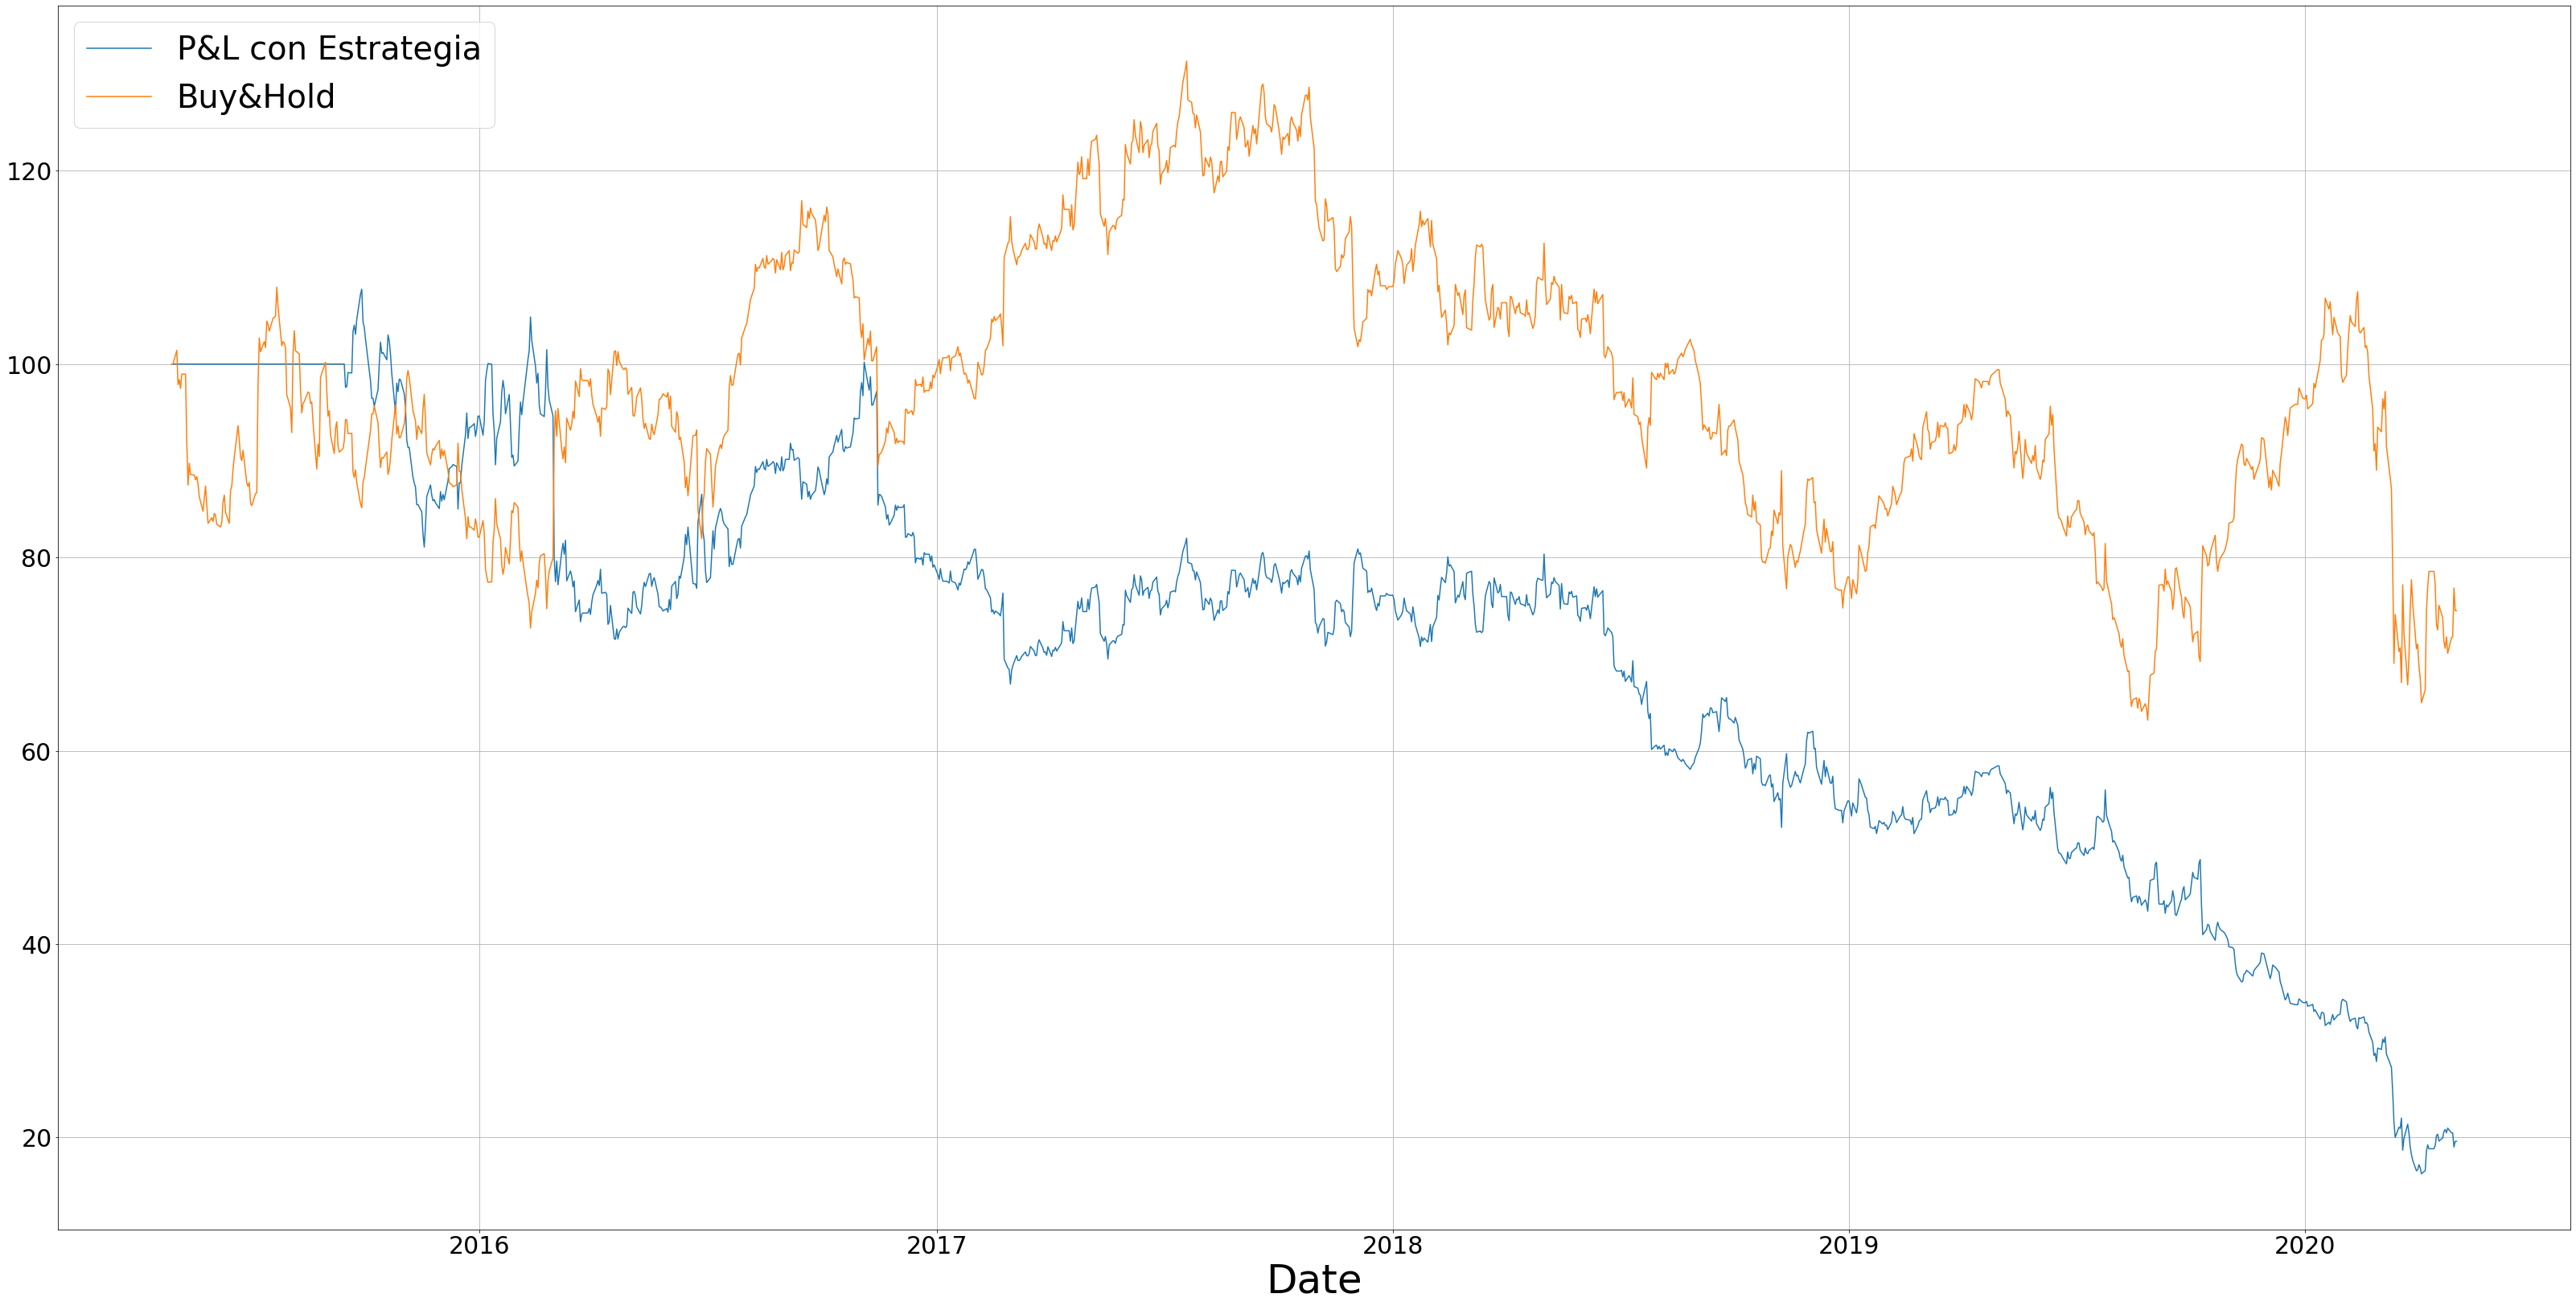

In [30]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indra_final["P&L"])
ax1 = plt.plot(indra_final["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["P&L con Estrategia", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [33]:
indra_citi = pd.DataFrame(indra_final.loc[:, 'P&L'])
indra_citi.columns = ['Indice_Indra']
indra_citi

,Indice_Indra
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [35]:
indra_citi.to_csv('./data_resultante/indra_citi.csv')